In [37]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from mlxtend.plotting import  plot_confusion_matrix
import pandas  as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.notebook import  tqdm
import warnings
warnings.filterwarnings("ignore")

In [38]:
vocab_size=10000
max_len=200
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.imdb.load_data(num_words=vocab_size)

In [39]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [40]:
x_train=tf.keras.preprocessing.sequence.pad_sequences(x_train,maxlen=max_len)
x_test=tf.keras.preprocessing.sequence.pad_sequences(x_test,maxlen=max_len)

In [41]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((25000, 200), (25000,), (25000, 200), (25000,))

In [42]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,128,input_length=max_len),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")

])

In [44]:
model.build(input_shape=(None,max_len))

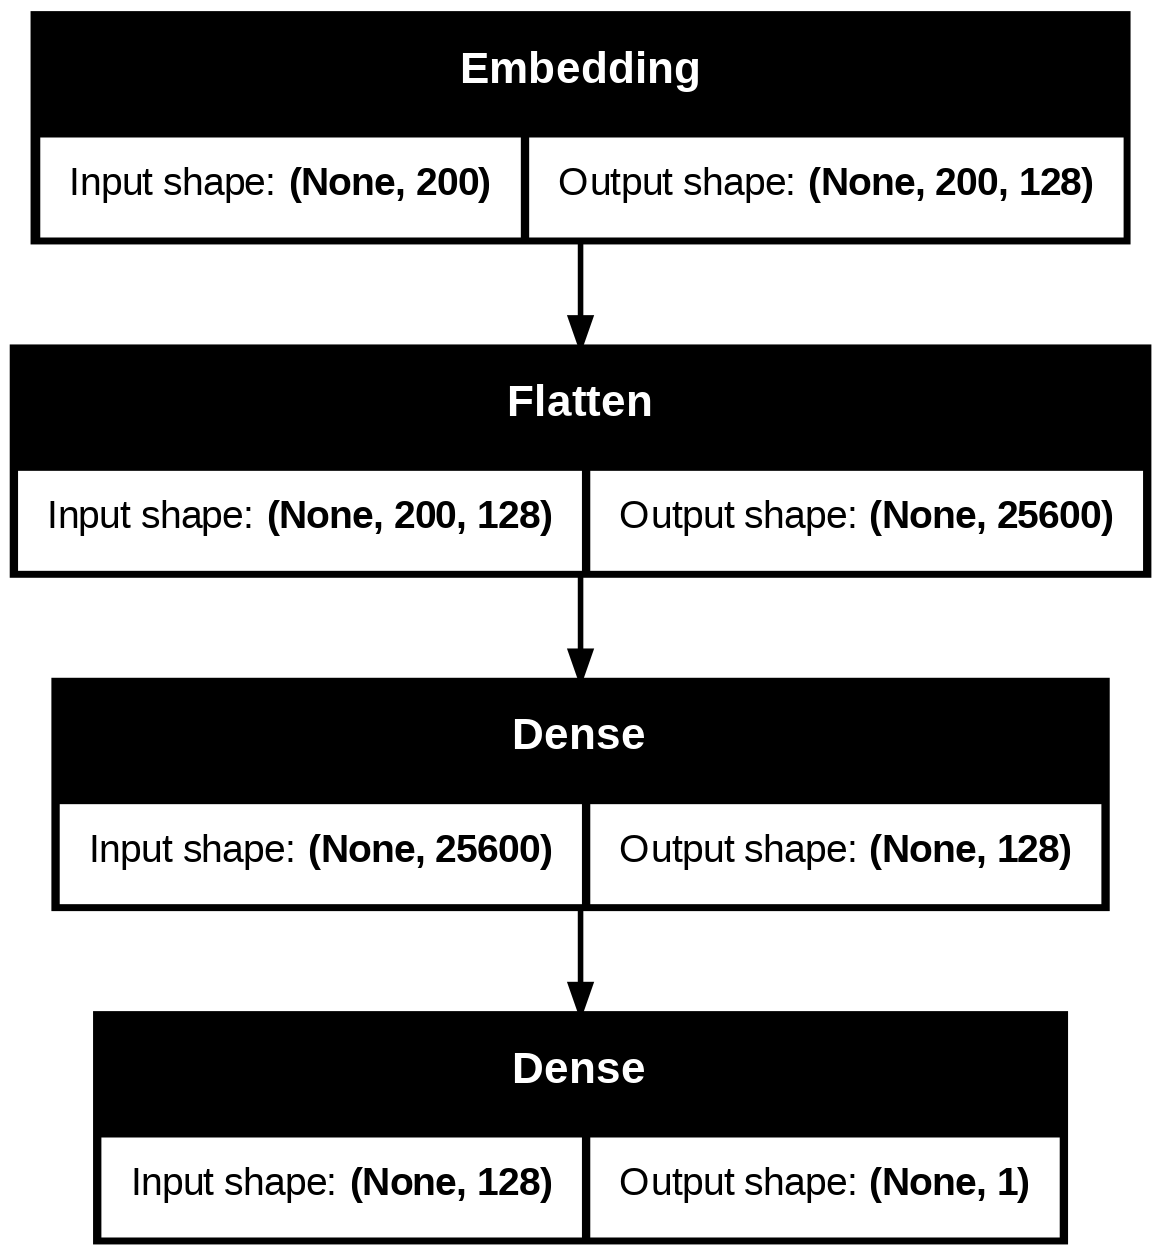

In [45]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [46]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,276,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,557,057 (17.38 MB)

 Trainable params: 4,557,057 (17.38 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]

)

In [49]:
history=model.fit(x_train,y_train,batch_size=128,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 36s 186ms/step - accuracy: 1.0000 - loss: 2.6084e-04 - val_accuracy: 0.8549 - val_loss: 0.5459
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 34s 152ms/step - accuracy: 1.0000 - loss: 1.7019e-04 - val_accuracy: 0.8566 - val_loss: 0.5572
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 42s 155ms/step - accuracy: 1.0000 - loss: 1.3284e-04 - val_accuracy: 0.8564 - val_loss: 0.5679
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 34s 173ms/step - accuracy: 1.0000 - loss: 9.5920e-05 - val_accuracy: 0.8572 - val_loss: 0.5779
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 37s 152ms/step - accuracy: 1.0000 - loss: 7.8099e-05 - val_accuracy: 0.8574 - val_loss: 0.5862


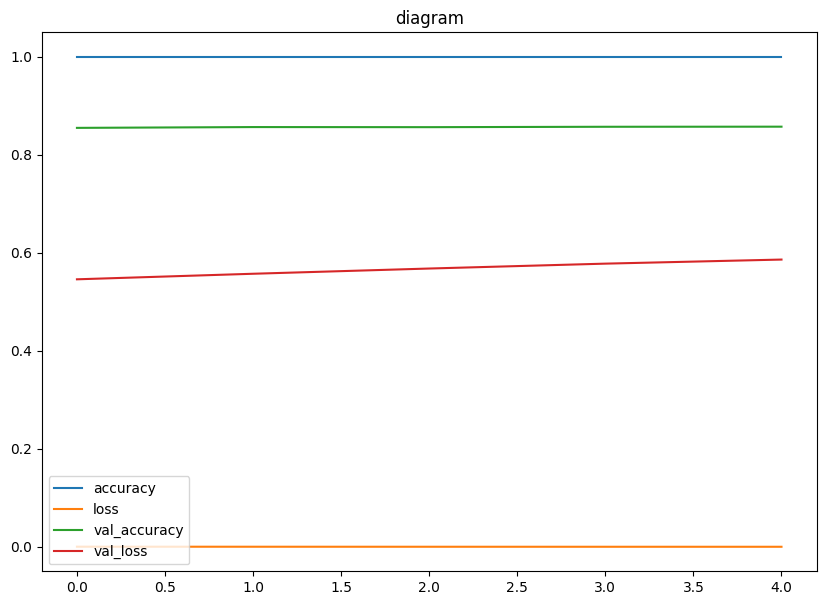

In [50]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("diagram")
plt.show()

In [51]:
loss,accuracy=model.evaluate(x_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8555 - loss: 0.5944


In [52]:
accuracy

0.8573600053787231

In [53]:
y_pred=model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step


In [54]:
y_pred

array([[1.7225457e-04],
       [9.9999917e-01],
       [8.6540115e-01],
       ...,
       [8.0766319e-04],
       [6.4173169e-03],
       [4.6525720e-01]], dtype=float32)

In [56]:
y_pred=y_pred.flatten()

In [57]:
y_pred

array([1.7225457e-04, 9.9999917e-01, 8.6540115e-01, ..., 8.0766319e-04,
       6.4173169e-03, 4.6525720e-01], dtype=float32)

In [58]:
y_pred=(y_pred>0.5).astype(int)

In [59]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86     12500
           1       0.86      0.86      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



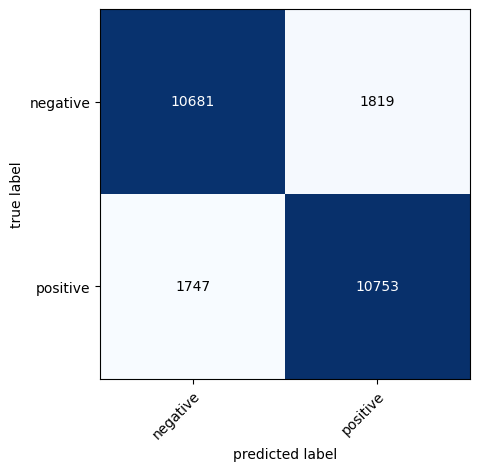

In [62]:
cm=metrics.confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm,class_names=["negative","positive"])
plt.show()